In [ ]:
import pandas as pd
import re

In [ ]:
# Constants
labelled_column_name = 'Labelled'

### Comparative binding to wild type vs mutant SARS-CoV-2 NP antigens by different epitope groups

In [ ]:
antigens_by_epitope_groups = pd.read_csv("antigens_by_epitope_groups.csv", sep='\t')
antigens_by_epitope_groups.dropna(inplace=True)
antigens_by_epitope_groups = antigens_by_epitope_groups.reset_index()
antigens_by_epitope_groups

In [ ]:
antigen_names = antigens_by_epitope_groups['blank'].tolist()

### Cross inhibition raw data

In [ ]:
ci_raw_data = pd.read_csv("cross_inhibitor_raw_data.csv", sep='\t')
ci_raw_data.dropna(inplace=True)
ci_raw_data_filtered = ci_raw_data.loc[ci_raw_data[labelled_column_name].isin(antigen_names)]
ci_raw_data_filtered.reset_index(level=0, drop=True, inplace=True)
ci_raw_data_filtered = ci_raw_data_filtered.drop('Neat', axis=1)

In [ ]:
ci_raw_data_filtered

### Cross inhibition sorted by homology

In [ ]:
labelled_column_location = ci_raw_data_filtered.columns.get_loc(labelled_column_name)

In [ ]:
# Get groups and insert
groups = ci_raw_data_filtered.apply(
    lambda row: antigens_by_epitope_groups.loc[antigens_by_epitope_groups['blank'] == row[labelled_column_name], 'group'].iloc[0], axis=1
)
ci_raw_data_filtered.insert(labelled_column_location+1, 'group', groups)

# Get sorting order and insert
sorting_order = ci_raw_data_filtered.apply(
    lambda row: antigens_by_epitope_groups.loc[antigens_by_epitope_groups['blank'] == row[labelled_column_name], 'index'].iloc[0], axis=1
)
ci_raw_data_filtered.insert(
    len(ci_raw_data_filtered.columns), 'sorting_order', sorting_order)


In [ ]:
# Group by group and sort rows by sorting_order
ci_raw_data_filtered.groupby("group")
ci_raw_data_filtered = ci_raw_data_filtered.set_index('group', append=True)
ci_raw_data_filtered = ci_raw_data_filtered.swaplevel(0, 1)

ci_raw_data_filtered = ci_raw_data_filtered.reset_index(level=1, drop=True)
ci_raw_data_filtered = ci_raw_data_filtered.set_index('Labelled', append=True)

ci_raw_data_filtered = ci_raw_data_filtered.sort_values(
    by='sorting_order', key=lambda x: x.astype(int))


In [ ]:
def ci_column_compare(x):
    index = antigens_by_epitope_groups.loc[
                antigens_by_epitope_groups['blank'].str.contains(x[:-1]), 'index']
    return index.values[0] if len(index)>0 else float('inf')

cols = ci_raw_data_filtered.columns.tolist()
cols.sort(key=ci_column_compare)

ci_raw_data_filtered = ci_raw_data_filtered[cols]

In [ ]:
ci_raw_data_filtered

In [15]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
# pip install kneed
from kneed import KneeLocator
%matplotlib inline

plt.rcParams['figure.figsize'] = [15, 10]

## Test K-MODS algorithm

In [16]:
# !pip install kmodes
from kmodes.kmodes import KModes

In [17]:
# Reading file
data_color = pd.read_csv("C:\\Users\\Oleksandr\Desktop\\Xema\\Xema\\Xema.WebApp\\drawn_color.csv")
data_color = data_color.set_index('label')

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 511.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 511.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 511.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 511.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 511.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1, cost: 334.0
Run 1, iteration: 2/100, moves: 0, cost: 334.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 13, cost: 334.0
Run 2, iteration: 2/100, moves: 0, cost: 

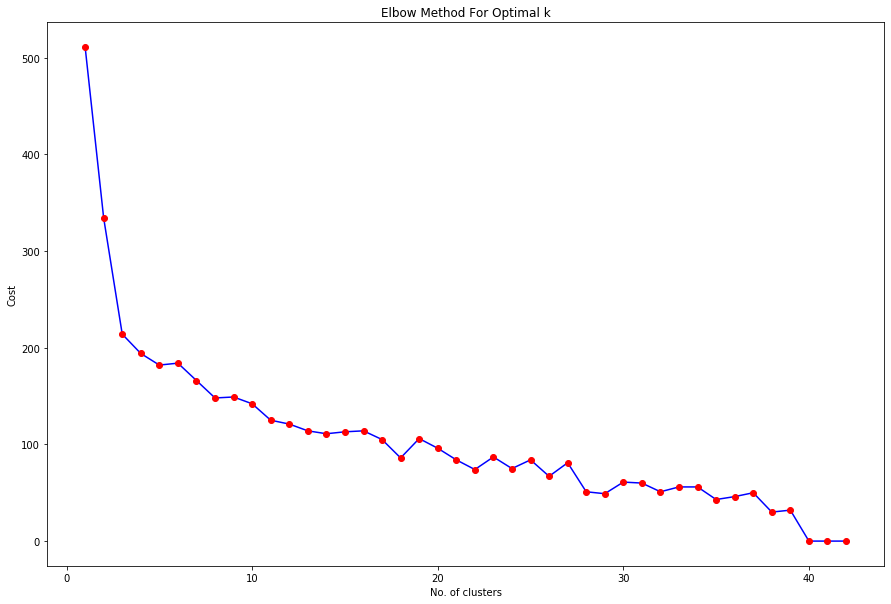

In [18]:
# Elbow curve to find optimal K
cost = []
K = range(1, data_color.shape[0])
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init="random", n_init=5, verbose=1)
    kmode.fit_predict(data_color)
    cost.append(kmode.cost_)

plt.plot(K, cost, 'o-', color="blue",
         markerfacecolor='red', markeredgecolor='red')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [19]:
# Get exact cluster amount
kl = KneeLocator(K, cost, curve="convex", direction="decreasing")
exact_cluster_amount = kl.elbow
exact_cluster_amount

4

In [20]:
# Building the model with N clusters
kmode = KModes(n_clusters=exact_cluster_amount, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(data_color)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2, cost: 192.0
Run 1, iteration: 2/100, moves: 0, cost: 192.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 200.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 9, cost: 195.0
Run 3, iteration: 2/100, moves: 2, cost: 192.0
Run 3, iteration: 3/100, moves: 0, cost: 192.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1, cost: 197.0
Run 4, iteration: 2/100, moves: 0, cost: 197.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 2, cost: 197.0
Run 5, iteration: 2/100, moves: 0, cost: 197.0
Best run was number 1


array([1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 2, 0, 3, 1, 0, 3, 1, 0,
       2, 2, 2, 2, 0, 3, 3, 2, 1, 2, 2, 1, 2, 1, 1, 0, 2, 2, 2, 0, 1],
      dtype=uint16)

In [21]:

data_color_clusterize = data_color
data_color_clusterize = data_color_clusterize.sort_index(ascending=False)
data_color_clusterize.insert(0, "cluster", clusters, True)
data_color_clusterize = data_color_clusterize.sort_values(by=['cluster'])
data_color_clusterize.to_excel('result_color.xlsx')

## Test K-MINS algorithm

In [ ]:
# !pip install sklearn
from sklearn.cluster import KMeans

In [ ]:
# Reading file
data_index = pd.read_csv("C:\\Users\\Oleksandr\Desktop\\Xema\\Xema\\Xema.WebApp\\drawn_index.csv")
data_index = data_index.set_index('label')

In [ ]:
# Elbow curve to find optimal K
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

cost = []
K = range(1, data_index.shape[0])
for k in K:
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(data_index)
    cost.append(kmeans.inertia_)

plt.plot(K, cost, 'o-', color="blue",
         markerfacecolor='red', markeredgecolor='red')
plt.xlabel('Number of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
# Get exact cluster amount
kl = KneeLocator(K, cost, curve="convex", direction="decreasing")
exact_cluster_amount = kl.elbow
exact_cluster_amount

In [ ]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

kmeans = KMeans(n_clusters=exact_cluster_amount, **kmeans_kwargs)
kmeans.fit(data_index)
kmeans.labels_

In [ ]:
data_index_clusterize = data_index
data_index_clusterize = data_index_clusterize.sort_index(ascending=False)
data_index_clusterize.insert(0, "cluster", kmeans.labels_, True)
data_index_clusterize = data_index_clusterize.sort_values(by=['cluster'])
data_index_clusterize.to_excel('result_index.xlsx')